# Laboratory Task 4

**Name:** Karylle B. dela Cruz <br>
**Section:** DS4A

**Instruction:** Train a linear regression model in PyTorch using a regression dataset. Use the following parameters.

- Criterion: MSE Loss
- Fully Connected Layers x 2
- Batch Size: 8
- Optimizer: SGD
- Epoch: 1000

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Epoch [100/1000], Loss: 0.033976
Epoch [200/1000], Loss: 0.032706
Epoch [300/1000], Loss: 0.056119
Epoch [400/1000], Loss: 0.050997
Epoch [500/1000], Loss: 0.013560
Epoch [600/1000], Loss: 0.025588
Epoch [700/1000], Loss: 0.038434
Epoch [800/1000], Loss: 0.020556
Epoch [900/1000], Loss: 0.024064
Epoch [1000/1000], Loss: 0.022879

Test MSE Loss: 0.035804


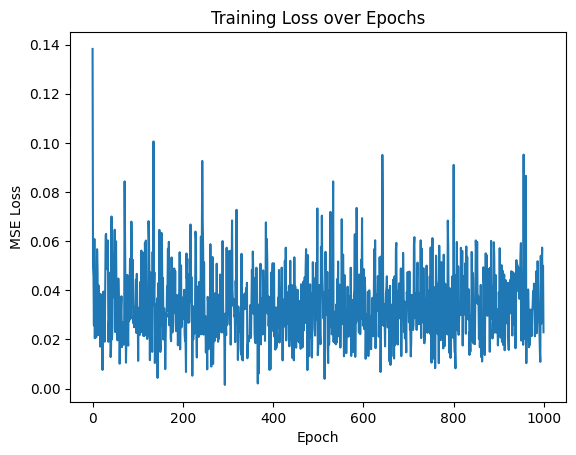

In [3]:
# Generate and scale dataset
X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1))

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DataLoader
batch_size = 8
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 8)
        self.fc2 = nn.Linear(8, 1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x

model = LinearRegressionModel()

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training Loop
epochs = 1000
losses = []

for epoch in range(epochs):
    for inputs, targets in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    losses.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")

# Evaluate
model.eval()
with torch.no_grad():
    preds = model(X_test)
    test_loss = criterion(preds, y_test)
print(f"\nTest MSE Loss: {test_loss.item():.6f}")

# Plot training loss
plt.plot(losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

Predictions

In [4]:
# Put the model in evaluation mode
model.eval()

# Example: predict on training data
with torch.no_grad():
    predictions = model(inputs)
    print("Predictions:\n", predictions)
    print("Targets:\n", targets)

Predictions:
 tensor([[-0.9254],
        [-2.0019],
        [-1.0357],
        [-1.2020],
        [-0.2057],
        [-0.3737],
        [-0.0378],
        [ 2.0561]])
Targets:
 tensor([[-0.8301],
        [-2.0704],
        [-1.2717],
        [-1.3092],
        [-0.4550],
        [-0.5152],
        [ 0.0391],
        [ 2.0286]])


### End